In [1]:
import pandas as pd
import numpy as np 

from keras.models import Sequential 
from keras.layers import LSTM, Dense, Dropout

/home/dtsc_swamy/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train = pd.read_csv('Google_Stock_Price_Train.csv')
train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
train = train.iloc[:, 1:2].values
train[:5]

array([[325.25],
       [331.27],
       [329.83],
       [328.34],
       [322.04]])

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_scale = sc.fit_transform(train)
train_scale[:5]

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225]])

In [5]:
xtr = train_scale[0:1257]
ytr= train_scale[1:1258]

xtr = np.reshape(xtr, (1257,1,1))

In [6]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Input

In [7]:
model = Sequential()
model.add(LSTM(units=4, activation='sigmoid', input_shape=(None, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(xtr, ytr , batch_size=32, epochs=200)

Epoch 1/200
1257/1257 [==============================] - 2s 1ms/step - loss: 0.0841
Epoch 2/200
1257/1257 [==============================] - 0s 74us/step - loss: 0.0806
Epoch 3/200
1257/1257 [==============================] - 0s 77us/step - loss: 0.0792
Epoch 4/200
1257/1257 [==============================] - 0s 75us/step - loss: 0.0778
Epoch 5/200
1257/1257 [==============================] - 0s 76us/step - loss: 0.0764
Epoch 6/200
1257/1257 [==============================] - 0s 79us/step - loss: 0.0749
Epoch 7/200
1257/1257 [==============================] - 0s 76us/step - loss: 0.0735
Epoch 8/200
1257/1257 [==============================] - 0s 76us/step - loss: 0.0719
Epoch 9/200
1257/1257 [==============================] - 0s 77us/step - loss: 0.0704
Epoch 10/200
1257/1257 [==============================] - 0s 79us/step - loss: 0.0689
Epoch 11/200
1257/1257 [==============================] - 0s 80us/step - loss: 0.0672
Epoch 12/200
1257/1257 [==============================] - 0s 76u

1257/1257 [==============================] - 0s 69us/step - loss: 2.9651e-04
Epoch 95/200
1257/1257 [==============================] - 0s 70us/step - loss: 2.9396e-04
Epoch 96/200
1257/1257 [==============================] - 0s 68us/step - loss: 2.9272e-04
Epoch 97/200
1257/1257 [==============================] - 0s 69us/step - loss: 2.9123e-04
Epoch 98/200
1257/1257 [==============================] - 0s 68us/step - loss: 2.8734e-04
Epoch 99/200
1257/1257 [==============================] - 0s 68us/step - loss: 2.8630e-04
Epoch 100/200
1257/1257 [==============================] - 0s 69us/step - loss: 2.8616e-04
Epoch 101/200
1257/1257 [==============================] - 0s 70us/step - loss: 2.8208e-04
Epoch 102/200
1257/1257 [==============================] - 0s 68us/step - loss: 2.8122e-04
Epoch 103/200
1257/1257 [==============================] - 0s 70us/step - loss: 2.8016e-04
Epoch 104/200
1257/1257 [==============================] - 0s 68us/step - loss: 2.8018e-04
Epoch 105/200
1257

1257/1257 [==============================] - 0s 68us/step - loss: 2.5416e-04
Epoch 185/200
1257/1257 [==============================] - 0s 70us/step - loss: 2.5378e-04
Epoch 186/200
1257/1257 [==============================] - 0s 67us/step - loss: 2.5133e-04
Epoch 187/200
1257/1257 [==============================] - 0s 65us/step - loss: 2.5186e-04
Epoch 188/200
1257/1257 [==============================] - 0s 69us/step - loss: 2.5346e-04
Epoch 189/200
1257/1257 [==============================] - 0s 67us/step - loss: 2.4992e-04
Epoch 190/200
1257/1257 [==============================] - 0s 66us/step - loss: 2.5319e-04
Epoch 191/200
1257/1257 [==============================] - 0s 66us/step - loss: 2.5466e-04
Epoch 192/200
1257/1257 [==============================] - 0s 69us/step - loss: 2.5101e-04
Epoch 193/200
1257/1257 [==============================] - 0s 65us/step - loss: 2.5713e-04
Epoch 194/200
1257/1257 [==============================] - 0s 67us/step - loss: 2.5147e-04
Epoch 195/200

In [9]:
test = pd.read_csv('Google_Stock_Price_Test.csv')
test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [10]:
real_stock = test.iloc[:,1:2].values

In [14]:
inputs = real_stock

In [15]:
inputs.shape

(20, 1)

In [16]:
inputs = np.reshape(inputs, (20,1,1))
inputs.shape

(20, 1, 1)

In [17]:
predicted_stock_price = model.predict(inputs)
predicted_stock_price

array([[1.4195063],
       [1.4195063],
       [1.4195063],
       [1.4195063],
       [1.4195063],
       [1.4195063],
       [1.4195063],
       [1.4195063],
       [1.4195063],
       [1.4195063],
       [1.4195063],
       [1.4195063],
       [1.4195063],
       [1.4195063],
       [1.4195063],
       [1.4195063],
       [1.4195063],
       [1.4195063],
       [1.4195063],
       [1.4195063]], dtype=float32)

In [18]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[1042.1898],
       [1042.1898],
       [1042.1898],
       [1042.1898],
       [1042.1898],
       [1042.1898],
       [1042.1898],
       [1042.1898],
       [1042.1898],
       [1042.1898],
       [1042.1898],
       [1042.1898],
       [1042.1898],
       [1042.1898],
       [1042.1898],
       [1042.1898],
       [1042.1898],
       [1042.1898],
       [1042.1898],
       [1042.1898]], dtype=float32)

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

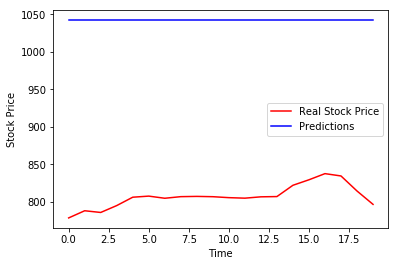

In [20]:
plt.plot(real_stock, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [32]:
import numpy as np, pandas as pd
train = pd.read_csv('Google_Stock_Price_Train.csv')
train_set = train.iloc[:, 1:2].values

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
train_scale = sc.fit_transform(train_set)

xtr = []
ytr = []

for i in range(60, train_scale.shape[0]):
    xtr.append(train_scale[i-60:i, 0])
    ytr.append(train_scale[i, 0])

xtr, ytr = np.array(xtr), np.array(ytr)

In [23]:
xtr

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [24]:
ytr

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [25]:
print(xtr.shape)
xtr = np.reshape(xtr, (xtr.shape[0], xtr.shape[1], 1))
print(xtr.shape)

(1198, 60)
(1198, 60, 1)


In [27]:
model = Sequential()
model.add(LSTM(units=50, return_sequences = True, input_shape=(xtr.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)                20200     
__________

In [28]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(xtr, ytr, epochs = 100, batch_size=64)

Epoch 1/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0795
Epoch 2/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0101
Epoch 3/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0036
Epoch 4/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0030
Epoch 5/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0029
Epoch 6/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0028
Epoch 7/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0027
Epoch 8/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0025
Epoch 9/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0025
Epoch 10/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0025
Epoch 11/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0024
Epoch 12/100
1198/1198 [==============================] - 4s 4ms/step - lo

1198/1198 [==============================] - 4s 3ms/step - loss: 0.0010
Epoch 98/100
1198/1198 [==============================] - 4s 4ms/step - loss: 9.2659e-04
Epoch 99/100
1198/1198 [==============================] - 4s 4ms/step - loss: 9.7397e-04
Epoch 100/100
1198/1198 [==============================] - 4s 3ms/step - loss: 9.7429e-04


In [29]:
test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock = test.iloc[:, 1:2].values

In [33]:
df_total = pd.concat((train['Open'], test['Open']), axis=0)
df_total

0       325.25
1       331.27
2       329.83
3       328.34
4       322.04
5       313.70
6       310.59
7       314.43
8       311.96
9       314.81
10      312.14
11      319.30
12      294.16
13      291.91
14      292.07
15      287.68
16      284.92
17      284.32
18      287.95
19      290.41
20      291.38
21      291.34
22      294.23
23      296.39
24      302.44
25      303.18
26      304.87
27      302.81
28      304.11
29      304.63
         ...  
1248    800.40
1249    790.22
1250    796.76
1251    795.84
1252    792.36
1253    790.90
1254    790.68
1255    793.70
1256    783.33
1257    782.75
0       778.81
1       788.36
2       786.08
3       795.26
4       806.40
5       807.86
6       805.00
7       807.14
8       807.48
9       807.08
10      805.81
11      805.12
12      806.91
13      807.25
14      822.30
15      829.62
16      837.81
17      834.71
18      814.66
19      796.86
Name: Open, Length: 1278, dtype: float64

In [34]:
train.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [35]:
test.tail()

,Date,Open,High,Low,Close,Volume
15,1/25/2017,829.62,835.77,825.06,835.67,"1,494,500"
16,1/26/2017,837.81,838.00,827.01,832.15,"2,973,900"
17,1/27/2017,834.71,841.95,820.44,823.31,"2,965,800"
18,1/30/2017,814.66,815.84,799.80,802.32,"3,246,600"
19,1/31/2017,796.86,801.25,790.52,796.79,"2,160,600"


In [36]:
test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [37]:
print(len(df_total), len(test))

1278 20


In [40]:
inputs = df_total[len(df_total)-len(test)-60: ].values
inputs.shape

(80,)

In [41]:
inputs=inputs.reshape(-1,1)
inputs.shape

(80, 1)

In [43]:
inputs = sc.transform(inputs)
xts =[]
for i in range(60,80):
    xts.append(inputs[i-60:i, 0])
xts = np.array(xts)
xts = np.reshape(xts, (xts.shape[0], xts.shape[1],1))

predicted_stock = model.predict(xts)
predicted_stock = sc.inverse_transform(predicted_stock)




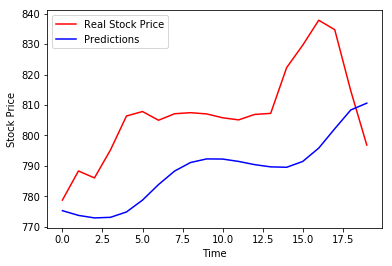

In [44]:
plt.plot(real_stock, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock, color='blue', label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
